<a href="https://colab.research.google.com/github/ezahner/AI/blob/main/HW5/AI_HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Author: Erin Zahner
<br> AI: HW 5
<br> Genetic Algorithms</h3>

# **Task**

To use the GA package in Google Colab  (R) to perform multi-objective engineering design optimization for a load-bearing I-beam as shown below (frontal and side views).

The general optimization goal for this I-beam problem is to minimize F=[f1,f2]T where the cross section area (f1) and the static deflection (f2) of the I-beam are defined as:

* *f<sub>1</sub>(x) = 2x<sub>2</sub>x<sub>4</sub> + x<sub>3</sub>(x<sub>1</sub>-2x<sub>4</sub>)*

* *f<sub>2</sub>(x) = 60,000/x<sub>3</sub>(x<sub>1</sub>-2x<sub>4</sub>)<sup>3</sup>2x<sub>2</sub>x<sub>4</sub>[4x<sub>4</sub><sup>2</sup> + 3x<sub>1</sub>(x<sub>1</sub>-2x<sub>4</sub>)]*


The two objectives are conflicting in nature since minimization of f1 will result in maximization of f2 and vice versa.

The geometric side constraints are:

 * *10 ≤ x<sub>1</sub> ≤ 80*
 * *10 ≤ x<sub>2</sub> ≤ 50*
 * *0.9 ≤ x<sub>3</sub> ≤ 5.0*
 * *0.9 ≤ x<sub>4</sub> ≤ 5.0*


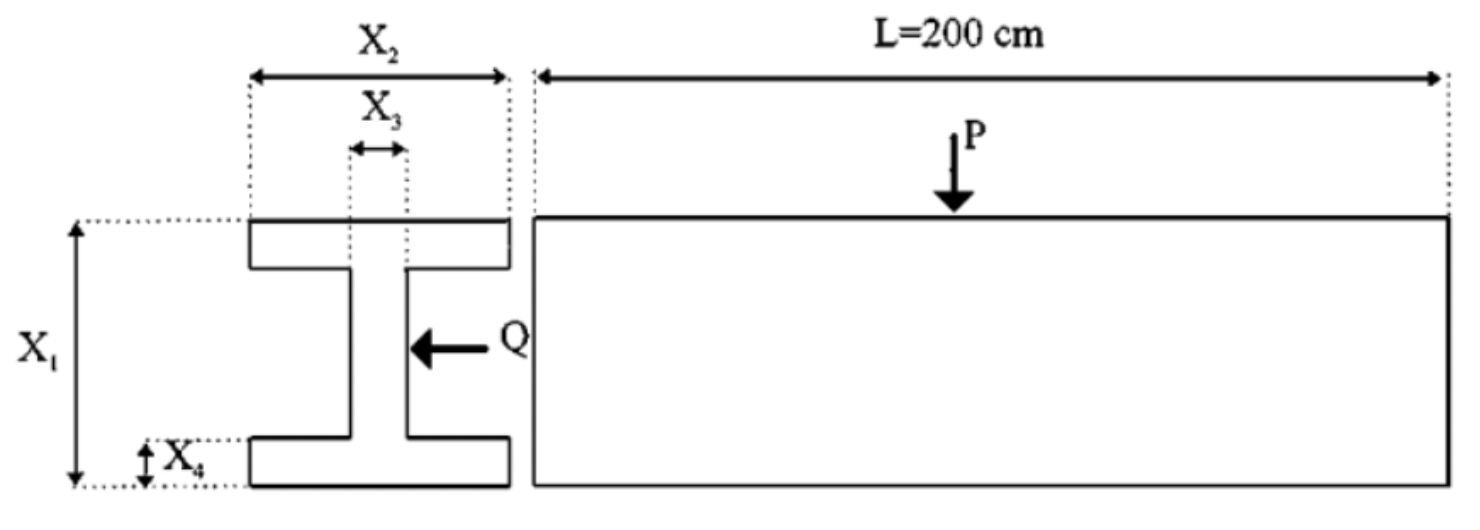


# **Population Parameters**

1. numGenerations = 100
2. populationSize = 50
3. Pc = 0.75
4. Pm = 0.001

In [ ]:
# necessary packages taken from github
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Loading the needed libraries

library(GA)
library(plotly)

# **Parameters**

In [ ]:
# Set the population parameters
numGenerations <- 100
populationSize <- 50
Pc <- 0.75
Pm <- 0.001

# Define constraints
x1 = seq(10, 80, by = 0.1)
x2 = seq(10, 50, by = 0.1)
x3 = seq(0.9, 5.0, by = 0.1)
x4 = seq(0.9, 5.0, by = 0.1)

lbounds = c(10, 10, 0.9, 0.9)
ubounds = c(80, 50, 5.0, 5.0)

# **Cross Section Area**

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -40.2441 
Solution = 
          x1       x2       x3       x4
[1,] 13.5818 12.32787 1.186229 1.083009

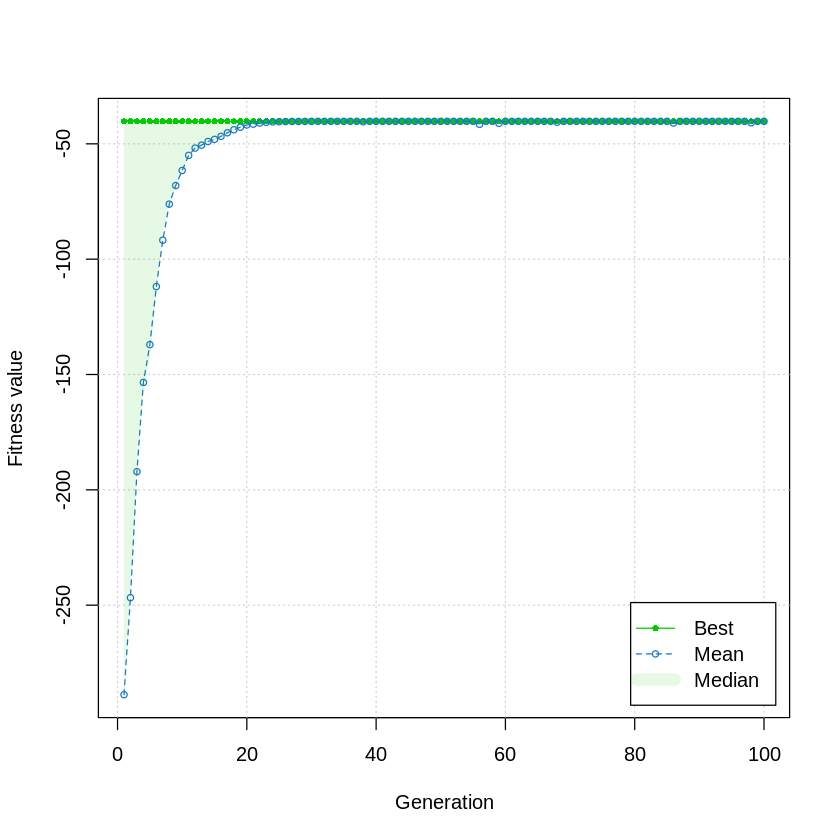

In [ ]:
# Cross Section Area

# Define function
f1 <- function(x1,x2,x3,x4) ((2 * x2 * x4) + (x3 * (x1 - (2 * x4))))

# run GA on function 1
GA <- ga(type = "real-valued",
         fitness = function(x) -f1(x[1], x[2], x[3], x[4]),
         lower = lbounds,
         upper = ubounds,
         maxiter = numGenerations,
         popSize = populationSize,
         pcrossover = Pc,
         pmutation = Pm)

# print summary and plot
summary(GA)
plot(GA)



# **Analysis of Cross Section Area**


Here we tested the genetic algorithm on f1, the cross section area. Everytime it is run there is some variation in the fitness function value and the values of the x's however, it is relatively consistent around -85 to -40 (give or take) for the fitness function. There was very decent variation between each of my iterations. This shows us that when minimizing the cross section area on its own, the best value lies somewhere between -85 and -40. After running it many times, the best fitness function value I got was -40. Here, the values of the xs are around:
x1 = 13, x2 = 12, x3 = 1, x4 = 1
I am not applying the decimal points here because there is so much variation between runs. These numbers are just estimates of the best possible values.

# **Static Deflation**

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.007431256 
Solution = 
           x1      x2      x3       x4
[1,] 75.36886 47.6523 4.26356 4.814311

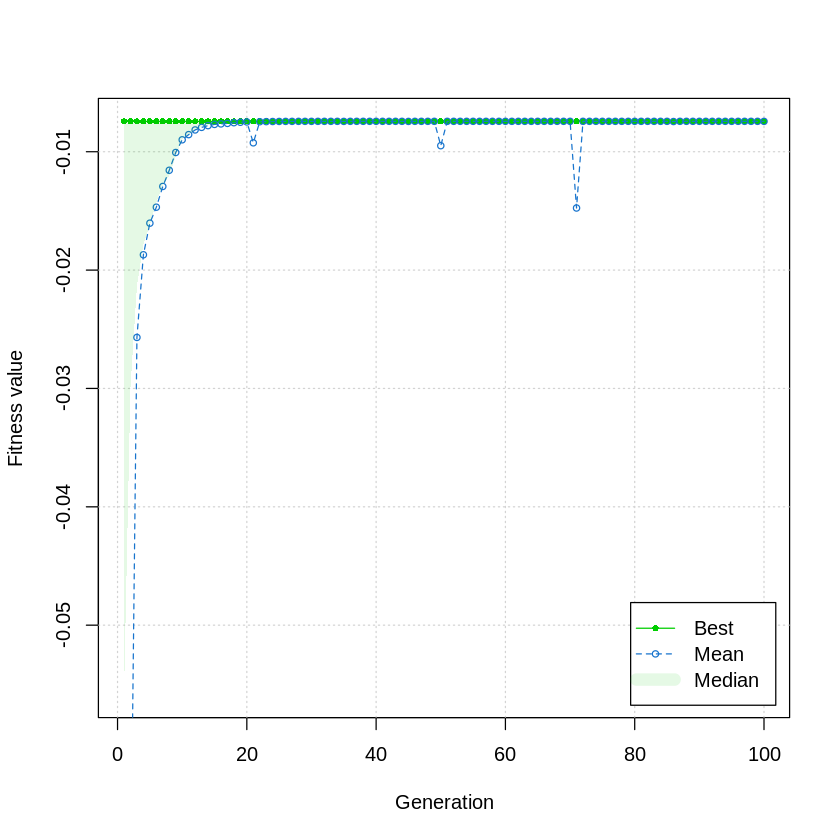

In [ ]:
# Static Deflection

# Define function 2
f2 <- function(x1,x2,x3,x4) 60000 / ((x3 * (x1 - 2 * x4)^3) + ((2 * x2 * x4) * ((4 * x4^2) + ((3 * x1) * (x1 - (2 * x4))))))

# Run GA on function 2
GA <- ga(type = "real-valued",
         fitness = function(x) -f2(x[1], x[2], x[3], x[4]),
         lower = lbounds,
         upper = ubounds,
         maxiter = numGenerations,
         popSize = populationSize,
         pcrossover = Pc,
         pmutation = Pm)


# print summary and plot
summary(GA)
plot(GA)

# **Analysis of Static Deflation**

The fitness function values for this static deflation function (f2) are much closer to 0 than that of the cross section area. These values seem to range between -1 and 0 in really small decimal numbers. It seems as though the true range here is about -0.01 (and some change) and -0.007 (and some change). The most optimal values here are those closest to 0, so anything around -0.007. When the fitness value is about -0.007, the x values are around:
x1 = 75, x2 = 47, x3 = 4, x4 = 4

As with the cross section area, I am not applying the decimal points here because there is so much variation between runs. These numbers are just estimates of the best possible values.

# **Weighted Function**

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -5.885276 
Solution = 
           x1       x2        x3       x4
[1,] 22.05824 15.05397 0.9507321 0.916536

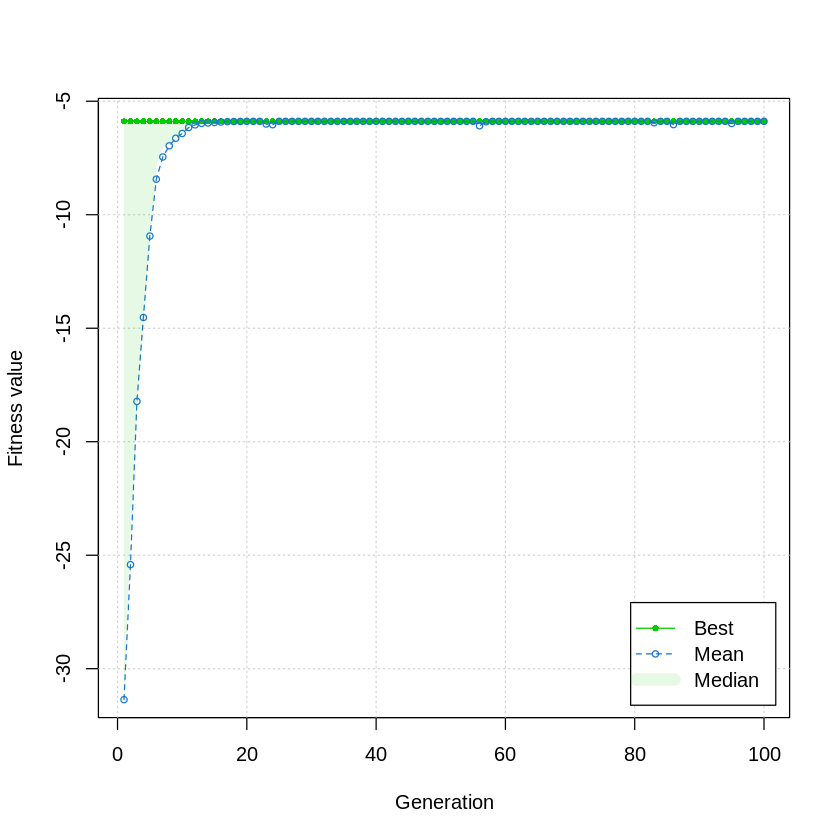

In [ ]:
# Weighted Function

# Define weighted function to combine f1 and f2
weighted_fitness <- function(x1,x2,x3,x4, a, b) {
  (a * f1(x1,x2,x3,x4) + b * f2(x1,x2,x3,x4))
}

# define weights
# a + b must always be equal to 1
a <- 0.1
b <- 0.9

# run GA on weighted function
GA <- ga(type = "real-valued",
         fitness = function(x) -weighted_fitness(x[1], x[2], x[3], x[4], a, b),
         lower = lbounds,
         upper = ubounds,
         maxiter = numGenerations,
         popSize = populationSize,
         pcrossover = Pc,
         pmutation = Pm)

# print summary and plot
summary(GA)
plot(GA)


# **Weighted Function Analysis**

For the weighted function, I ran a few different tests, shifting the weights between a and b. The weight ***a*** favors the cross section area function (f1), while the weight ***b*** favors the static deflation function (f2). With this in mind I tried a few different distributions of weight and recorded the results after repeatedly running each test:


*   equal weights:
<br><tab>**a** = 0.5
<br> **b** = 0.5
<br> **fitness function range:** -50 to -21 <br> **average fitness value:** around -30 to -40 (better than -30 was uncommon)
<br> **best fitness value:**  around -21
<br> **x values:** x1 = 14, x2 = 11, x3 = 1, x4 = 0.9

*   **a** slightly favored:
<br><tab>**a** = 0.7
<br> **b** = 0.3
<br> **fitness function range:** -65 to -24 <br> **average fitness value:** in the -40s
<br> **best fitness value:**  around -24
<br> **x values:** x1 = 12, x2 = 10, x3 = 1, x4 = 1


*   **b** slightly favored:
<br><tab>**a** = 0.3
<br> **b** = 0.7
<br> **fitness function range:** -28 to -14, <br> **average fitness value:** around -20
<br> **best fitness value:**  around -14
<br> **x values:** x1 = 19, x2 = 12 x3 = 1, x4 = 0.9

*   **a** majorly favored:
<br><tab>**a** = 0.9
<br> **b** = 0.1
<br> **fitness function range:** -83 to -43, <br> **average fitness value:** around -55
<br> **best fitness value:**  around -43
<br> **x values:** x1 = 27, x2 = 11, x3 = 0.9, x4 = 0.1


*   **b** majorly favored:
<br><tab>**a** = 0.1
<br> **b** = 0.9
<br> **fitness function range:** -12 to -5, <br> **average fitness value:** around -7
<br> **best fitness value:**  around -5
<br> **x values:** x1 = 22, x2 = 15, x3 = 0.9, x4 = 0.9



For each of these weighted tests, I ran each around 30 times (give or take) and recorded the range of fitness values, the average fitness value (most common), the best fitness value (closest to 0), and the x values at the best fitness value. Since the results are different everytime, what I recorded as the best might very well not be the best solution to the problem. This is why I did not focus on the long string of decimal points of each solution. Overall, we can see that to get the function closest to 0, it is best to apply more weight to the static deflation function (f2). Here, we got the fitness function to -5, a big improvment from some of the other tests where the best value was up to -43 when a was given more weight. Therefore, when faces with this problem, architects who are placing the beams should focus more on the static deflation function than the cross section area function, but should always keep both in mind.